## Data Analysis

Analyze and visualize women’s participation in the workplace and gender gap. Examining trends over time and how they compare.

In [ ]:
#import libraries
import pandas as pd
import plotly.express as px
import sqlite3
import csv

### Chart #1: Women's Participation in the Workforce by Continent
In the Participation table, we don't have the continent for the location. To get the continent, we will combine the continent table with the participation table using the ISO-3 code. 

In [151]:
#query that joins the participation table with the continent table. 
with sqlite3.connect("women_in_the_workforce.db", timeout=30) as con:
    query = '''
    SELECT participation.Year, AVG(participation.Rate) as avgrate, continents.Continent, participation.Location, participation.Code
    FROM participation
    LEFT JOIN continents
    ON participation.Code = continents.Code
    GROUP BY participation.Year, continents.Continent
    '''

#create a dataframe from the query
avgbycontinent = pd.read_sql_query(query, con)

#display the data
avgbycontinent 

,Year,avgrate,Continent,Location,Code
0,1991,47.993245,None,Channel Islands,OWID_CIS
1,1991,53.951925,Africa,Algeria,DZA
2,1991,41.798796,Asia,Afghanistan,AFG
3,1991,49.041100,Europe,Albania,ALB
4,1991,45.469714,North America,Bahamas,BHS
...,...,...,...,...,...
219,2022,44.614327,Asia,Afghanistan,AFG
220,2022,54.777821,Europe,Albania,ALB
221,2022,51.104524,North America,Bahamas,BHS
222,2022,54.459909,Oceania,Australia,AUS


Using the Ploty library, we'll create a line chart showing the trends by continent. 

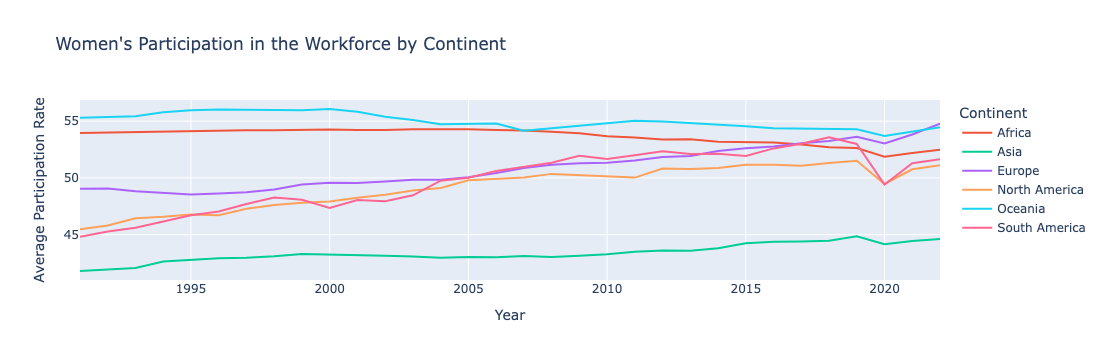

In [159]:
#create line chart
fig =px.line(
    avgbycontinent,
    x='Year', #this defines the x axis.
    y='avgrate', #this defines the y axis.
    color='Continent', #identifies how the colors should be grouped
    title='Women\'s Participation in the Workforce by Continent') #title of the chart

# updated lable
fig.update_layout(
    yaxis_title="Average Participation Rate"  
)

#display chart
fig.show() 

### Chart #2: Wage Gap by Location
In the Wage Gap table, we don't have the continent for the location. To get the continent, we will combine the continent table with the Wage Gap table using the ISO-3 code. 

In [112]:
#query that joins the wage gape table with the continent table. 
with sqlite3.connect("women_in_the_workforce.db", timeout=30) as con:
    query = '''
    SELECT wagegap.Year, wagegap.Location, wagegap.Gap, wagegap.Code, continents.Continent
    FROM wagegap
    LEFT JOIN continents
    ON wagegap.Code = continents.Code
    '''

#create a dataframe from the query
wagegapbylocation = pd.read_sql_query(query, con)

#display the data
wagegapbylocation


,Year,Location,Gap,Code,Continent
0,1975,Australia,21.6,AUS,Oceania
1,1976,Australia,20.8,AUS,Oceania
2,1977,Australia,18.4,AUS,Oceania
3,1978,Australia,19.8,AUS,Oceania
4,1979,Australia,20.0,AUS,Oceania
...,...,...,...,...,...
631,2012,United States,19.1,USA,North America
632,2013,United States,17.9,USA,North America
633,2014,United States,17.5,USA,North America
634,2015,United States,18.9,USA,North America


Let's check to see how many countries are in the data source.

In [115]:
#query to count the distinct count of location rows
TotalCountries = '''
    SELECT COUNT(DISTINCT Location) AS total_country_count
    FROM wagegap
    '''
#create a dataframe from the query
TotalCountries = pd.read_sql_query(TotalCountries, con)

#display the total
TotalCountries

,total_country_count
0,38


That's a lot of countries to map out on a chart. Let's look at how many countries per year there are. 

In [123]:
#query to count the distinct count of location rows grouped by year
YearlyCountryCounts = '''
SELECT 
       wagegap.Year,
       COUNT(DISTINCT Location)
    FROM wagegap
    GROUP BY wagegap.Year
    '''

#create a dataframe from the query
YearlyCountryCounts = pd.read_sql_query(YearlyCountryCounts, con)

#display the total
YearlyCountryCounts



,Year,COUNT(DISTINCT Location)
0,1970,1
1,1971,1
2,1972,1
3,1973,2
4,1974,2
5,1975,5
6,1976,4
7,1977,5
8,1978,6
9,1979,5


The above table shows that we don't have data for each country for each year. Instead of looking at it for each year, let's filter it down to one year. 

In [164]:
#filter to only show 2015
filtered_df = wagegapbylocation.query("Year == 2015")

#create the map
fig = px.choropleth(filtered_df, 
                    locations="Code", #identify the areas/locations
                    color="Gap", #the figure we're comparing
                    hover_name="Location", # information shown on hover
                    color_continuous_scale=px.colors.sequential.Plasma, #color identification
                    title='Wage Gap by Location: 2015') #chart title
fig.show()


Now let's look at what the rates were 15 years prior. 

In [165]:
#filter to only show 2000
filtered_df = wagegapbylocation.query("Year == 2000")

#create the map
fig = px.choropleth(filtered_df, 
                    locations="Code", #identify the areas/locations
                    color="Gap", #the figure we're comparing
                    hover_name="Location", # information shown on hover
                    color_continuous_scale=px.colors.sequential.Plasma, #color identification
                    title='Wage Gap by Location: 2000' #chart title
                    ) 
fig.show()


### Chart #3: Wage Gap & Participation Comparison
Does wage gap have any coorelation to the female workforce participation? In this last chart, we'll calculate the difference between the participation rate and wage gap to see how it compares overtime. 

In [167]:
#query to calculate Participation Rate subtracted from wage gap.  
gapvsparticpation = '''
    SELECT wagegap.Year, wagegap.Location, wagegap.Gap, wagegap.Code, participation.Rate, (participation.Rate-wagegap.Gap) as Difference
    FROM wagegap
    LEFT JOIN Participation
    ON wagegap.Code = participation.Code AND wagegap.Year = participation.Year
    '''

#create a dataframe from the query
gapvsparticpation = pd.read_sql_query(gapvsparticpation, con)

#display the data
gapvsparticpation

,Year,Location,Gap,Code,Rate,Difference
0,1975,Australia,21.6,AUS,NaN,NaN
1,1976,Australia,20.8,AUS,NaN,NaN
2,1977,Australia,18.4,AUS,NaN,NaN
3,1978,Australia,19.8,AUS,NaN,NaN
4,1979,Australia,20.0,AUS,NaN,NaN
...,...,...,...,...,...,...
631,2012,United States,19.1,USA,56.799,37.699
632,2013,United States,17.9,USA,56.364,38.464
633,2014,United States,17.5,USA,56.215,38.715
634,2015,United States,18.9,USA,56.002,37.102


Since some the locations either don't have the data for Gap or Rate, we're getting some rows without a Difference value. Let's remove these. 

In [168]:
#remove rows with NaN in the Difference column
df_clean = gapvsparticpation.dropna(subset=['Difference']) 

#display the data
df_clean 

,Year,Location,Gap,Code,Rate,Difference
16,1991,Australia,16.0,AUS,51.957,35.957
17,1992,Australia,14.3,AUS,51.921,37.621
18,1993,Australia,13.2,AUS,51.688,38.488
19,1994,Australia,14.4,AUS,52.589,38.189
20,1995,Australia,14.5,AUS,53.588,39.088
...,...,...,...,...,...,...
631,2012,United States,19.1,USA,56.799,37.699
632,2013,United States,17.9,USA,56.364,38.464
633,2014,United States,17.5,USA,56.215,38.715
634,2015,United States,18.9,USA,56.002,37.102


That looks much better. Let's create the chart. 

In [169]:
#create a line chart using the cleaned data.
fig = px.line(df_clean, 
                 x='Year',  #x axis
                 y= 'Difference',  #y axis
                 title="Correlation Between Rate and Gap", #title
                 color="Location", #color of the lines
                )
#show the Chart.
fig.show()

That wraps up our analysis. On the charts, make sure to select locations to toggle on/off locations to narrow down the scope.